In [29]:
import numpy as np
import pandas as pd

from keras.datasets import mnist

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn import decomposition

import matplotlib.pyplot as plt


In [42]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
X = np.zeros((x_train.shape[0], 784))
X = pd.DataFrame(X)
print(X.shape)
Y = pd.DataFrame(y_train)
print(Y.head())

(60000, 784)
   0
0  5
1  0
2  4
3  1
4  9


In [43]:
# lets onyl use 20% of the data for the visualization
X = X.sample(frac=0.5, random_state=42).reset_index(drop=True)
Y = Y.sample(frac=0.5, random_state=42).reset_index(drop=True)
print(X.shape)
print(Y.shape)

(30000, 784)
(30000, 1)


In [45]:
X_flat = x_train.reshape(x_train.shape[0], -1)


In [47]:
X_flat.shape

(60000, 784)

### PCA

In [48]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(X_flat)
print(standardized_data.shape)

(60000, 784)


In [49]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_results = pca.fit_transform(standardized_data)



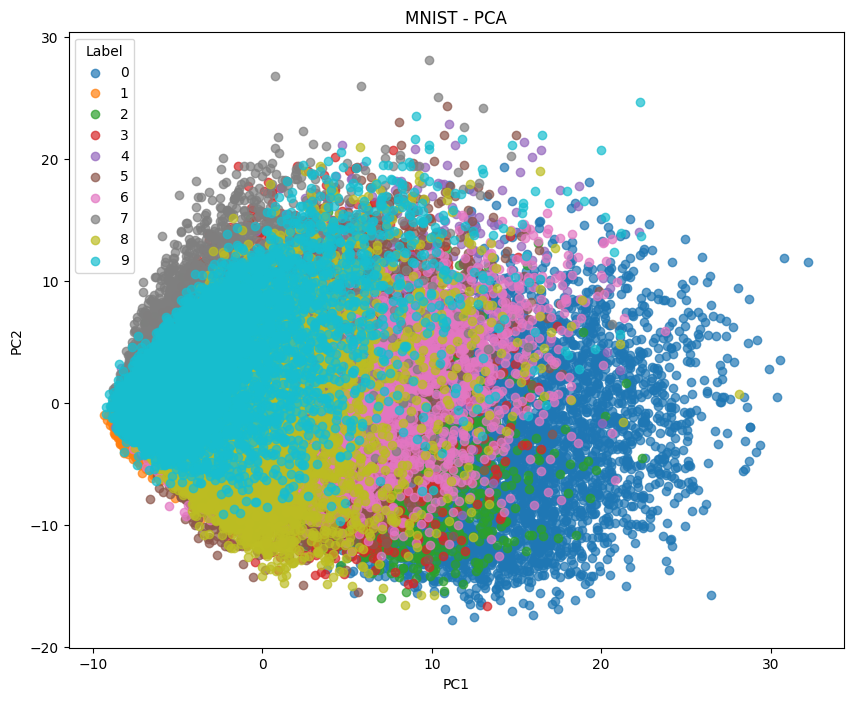

In [51]:
df_pca = pd.DataFrame({'PC1': pca_results[:, 0], 'PC2': pca_results[:, 1], 'Label': y_train})
plt.figure(figsize=(10, 8))
for label in range(10):
    plt.scatter(df_pca[df_pca['Label'] == label]['PC1'],
                df_pca[df_pca['Label'] == label]['PC2'],
                label=str(label),
                alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('MNIST - PCA')
plt.legend(title='Label')
plt.show()

### t-SNE

In [52]:
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(X_flat)



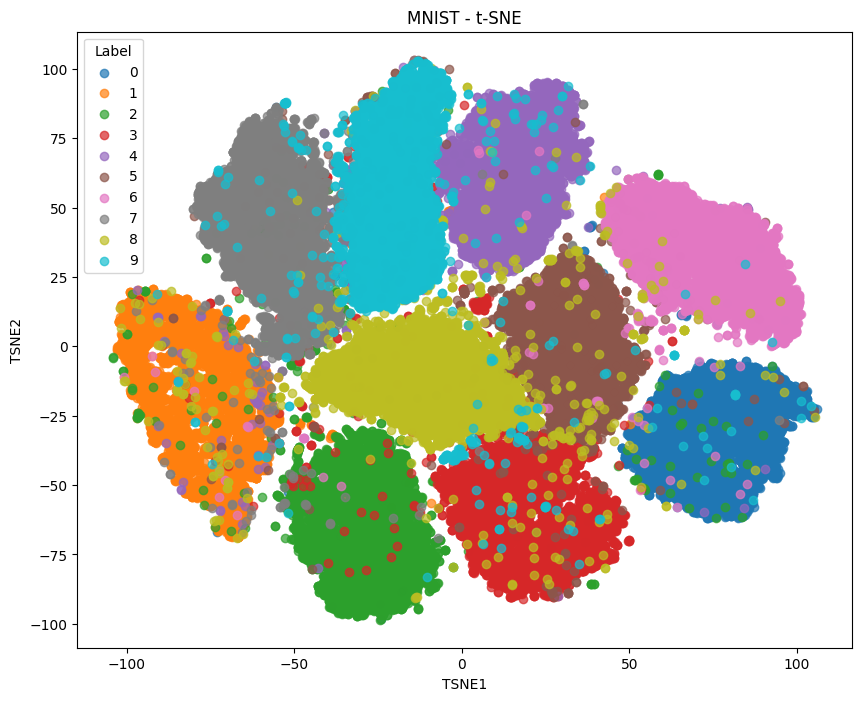

In [53]:
df_tsne = pd.DataFrame({'TSNE1': tsne_results[:, 0], 'TSNE2': tsne_results[:, 1], 'Label': y_train})

# Visualizar los datos en un scatter plot
plt.figure(figsize=(10, 8))
for label in range(10):
    plt.scatter(df_tsne[df_tsne['Label'] == label]['TSNE1'],
                df_tsne[df_tsne['Label'] == label]['TSNE2'],
                label=str(label),
                alpha=0.7)
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.title('MNIST - t-SNE')
plt.legend(title='Label')
plt.show()

### Let's plot it together

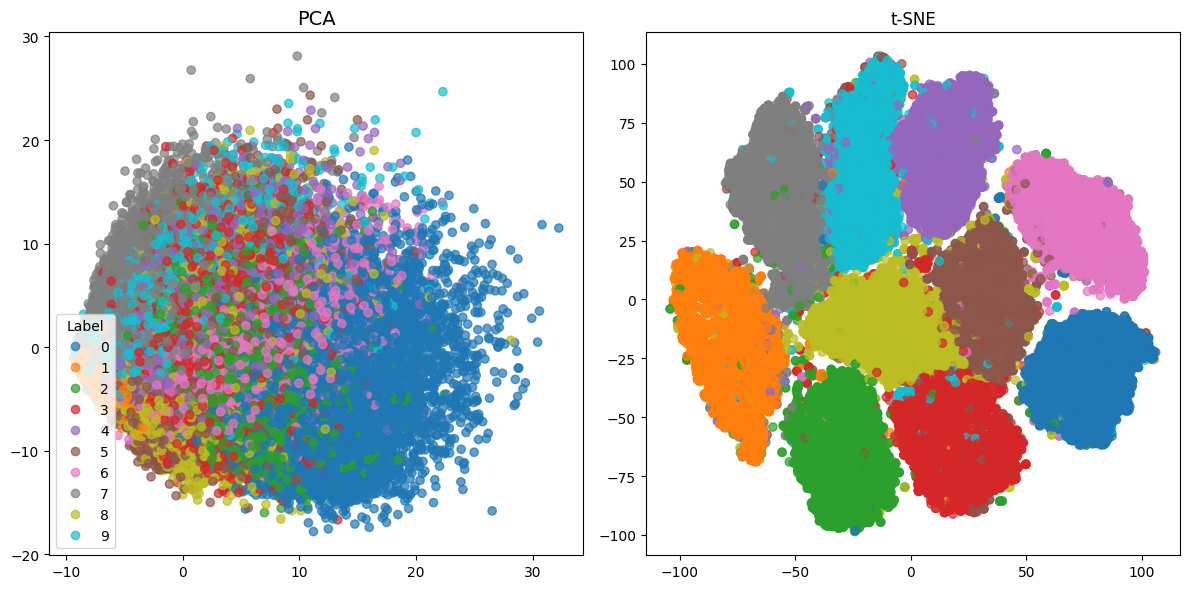

In [67]:
import matplotlib.pyplot as plt

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Visualización de PCA
scatter1 = ax1.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Label'], cmap='tab10', alpha=0.7)
ax1.set_title('PCA', fontsize=14)

# Visualización de t-SNE
scatter2 = ax2.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], c=df_tsne['Label'], cmap='tab10', alpha=0.7)

ax2.set_title('t-SNE')

# Crear una leyenda compartida
labels = list(range(10))
handles = [scatter1.legend_elements()[0][label] for label in labels]
ax1.legend(handles, labels, title='Label', loc='lower left')

# Ajustar los espacios entre subplots
fig.tight_layout()

# Mostrar la figura
plt.show()


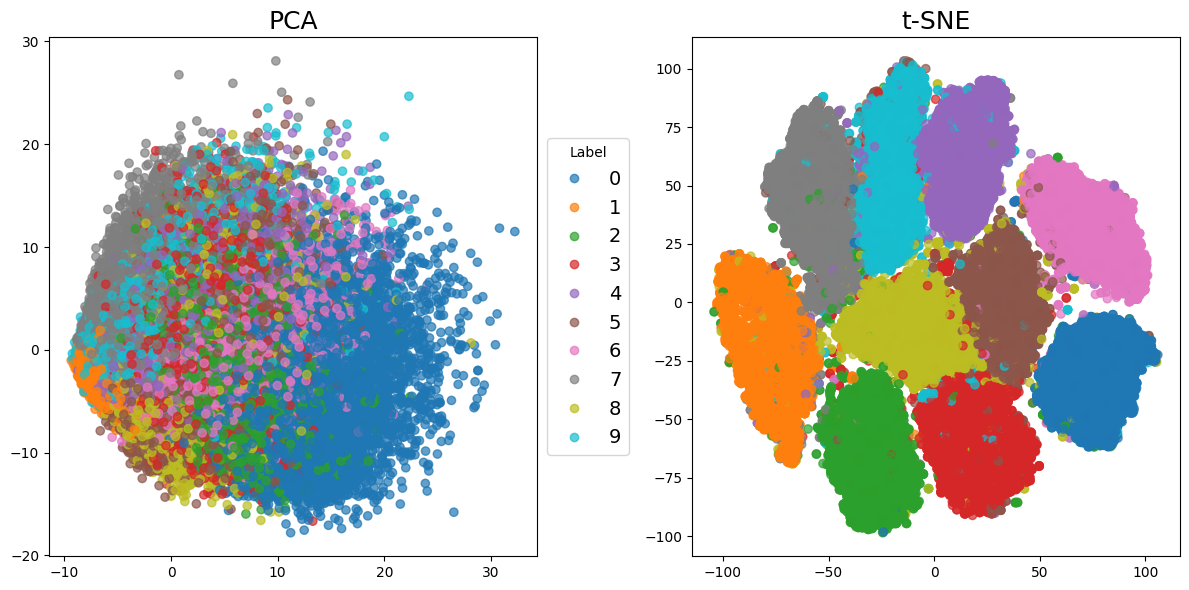

In [77]:
import matplotlib.pyplot as plt

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Visualización de PCA
scatter1 = ax1.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Label'], cmap='tab10', alpha=0.7)

ax1.set_title('PCA', fontsize=18)

# Visualización de t-SNE
scatter2 = ax2.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], c=df_tsne['Label'], cmap='tab10', alpha=0.7)
ax2.set_title('t-SNE', fontsize=18)

labels = list(range(10))
handles = [scatter1.legend_elements()[0][label] for label in labels]
legend = ax1.legend(handles, labels, title='Label', loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=14 )

# Ajustar los espacios entre subplots
fig.tight_layout()

# Mostrar la figura
plt.show()
fig.savefig("tsne_pca.jpg", dpi=600)